In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import squarify
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv(r"income_Inequality.csv")
print("The Number of rows & columns :",df.shape)
df.head(5)

The Number of rows & columns : (209499, 43)


,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


### Removing leading & trailing spaces

In [3]:
def strip_spaces(x):
    if isinstance(x, str):
        return x.strip()
    else:
        return x
df=df.applymap(strip_spaces)    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [5]:
numerical_col = df.select_dtypes(include = ['int64','float64']).columns.tolist()
categorical_col = df.select_dtypes(include = ['object','category']).columns.tolist()
print("Number of Numerical columns :",len(numerical_col))
print("Numerical columns 👉",numerical_col,'\n')
print("Number of Categorical columns :",len(categorical_col))
print("Categorical columns 👉",categorical_col)

Number of Numerical columns : 13
Numerical columns 👉 ['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'] 

Number of Categorical columns : 30
Categorical columns 👉 ['ID', 'gender', 'education', 'class', 'education_institute', 'marital_status', 'race', 'is_hispanic', 'employment_commitment', 'unemployment_reason', 'is_labor_union', 'industry_code_main', 'occupation_code_main', 'household_stat', 'household_summary', 'under_18_family', 'veterans_admin_questionnaire', 'tax_status', 'citizenship', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state', 'income_above_limit']


In [6]:
#Statistics metric describing about the Numerical values in data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


In [7]:
#Number of unique values , Mode value of the categorical values and it's frequency
df.describe(include='O').T

,count,unique,top,freq
ID,209499,209499,ID_TZ0000,1
gender,209499,2,Female,108784
education,209499,17,High school graduate,50627
class,104254,8,Private,75617
education_institute,13302,2,High school,7247
marital_status,209499,7,Never married,90723
race,209499,5,White,175709
is_hispanic,209499,10,All other,180404
employment_commitment,209499,8,Children or Armed Forces,129789
unemployment_reason,6520,5,Other job loser,2242


<div style="border-radius:10px; border:#F24C3D solid; padding: 15px; background-color: #22A699; font-size:100%; text-align:left">
<h3 align="left"><font color='#C70039'>💡 Observations:</font></h3>
    
*  ? is appearing as mode in four columns👇 [migration_code_change_in_msa,migration_code_change_in_reg,migration_prev_sunbelt,migration_code_move_within_reg
* income_above_limit	is the target variable. 
* It is a Binary classification problem as it has 2 unique values.
* One of the categories "Below limit"'s frequency is 196501/209499.So the dataset is imbalanced. 


In [8]:
#Replacing ? with Nan value
df.replace({" ?":np.nan},inplace=True)
df.replace({"?":np.nan},inplace=True)
#Finding Duplicate values
print("Number of duplicate Values",df.duplicated().sum())

Number of duplicate Values 0


In [9]:
#Missing values summary
round((df.isna().sum()/df.shape[0])*100,2).astype(str)+"%"

ID                                  0.0%
age                                 0.0%
gender                              0.0%
education                           0.0%
class                             50.24%
education_institute               93.65%
marital_status                      0.0%
race                                0.0%
is_hispanic                         0.0%
employment_commitment               0.0%
unemployment_reason               96.89%
employment_stat                     0.0%
wage_per_hour                       0.0%
is_labor_union                    90.42%
working_week_per_year               0.0%
industry_code                       0.0%
industry_code_main                  0.0%
occupation_code                     0.0%
occupation_code_main              50.45%
total_employed                      0.0%
household_stat                      0.0%
household_summary                   0.0%
under_18_family                   72.39%
veterans_admin_questionnaire      99.01%
vet_benefit     

<div style="border-radius:10px; border:#F24C3D solid; padding: 15px; background-color: #22A699; font-size:100%; text-align:left">
<h3 align="left"><font color='#C70039'>💡 Observations:</font></h3>
    
* There are 11 columns having missing values equal and more than 50%.
    
* Country_of_birth of own,father & mother columns are not significant.    
    
* It is suggested to remove those columns.    
    

In [10]:
#Dropping columns having missing value equal and more than 50%
missingValue_col=[]
for col in df.columns:
    if (df[col].isna().sum()/df.shape[0])>=0.50:
        missingValue_col.append(col)
df.drop(missingValue_col,inplace=True,axis=1) 
df.drop(["ID","country_of_birth_own","country_of_birth_father","country_of_birth_mother"],inplace=True,axis=1)
print("The Number of rows & columns after dropping missing columns :", df.shape)
print("Dropped columns having missing values 👉 ",missingValue_col)

The Number of rows & columns after dropping missing columns : (209499, 25)
Dropped columns having missing values 👉  ['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

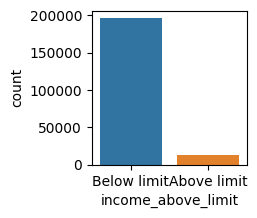

Below limit    93.8%
Above limit     6.2%
Name: income_above_limit, dtype: object

In [11]:
# Visualizing Target column - income_above_limit
plt.figure(figsize=(2,2)) 
sns.countplot(data=df,x="income_above_limit")
plt.show()
round(df["income_above_limit"].value_counts()/df.shape[0]*100,2).astype(str)+"%"

In [12]:
#Counts of unique values in each columns
for col in df.describe(include='O').columns:
    print(df[col].value_counts(),end='\n\n')

Female    108784
Male      100715
Name: gender, dtype: int64

High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree (MD DDS DVM LLB JD)     1852
Doctorate degree(PhD EdD)                  1318
Less than 1st grade                         829
Name: education, dtype: int64

Never married                      90723
Married-civilian spouse present    88407
Divorced 

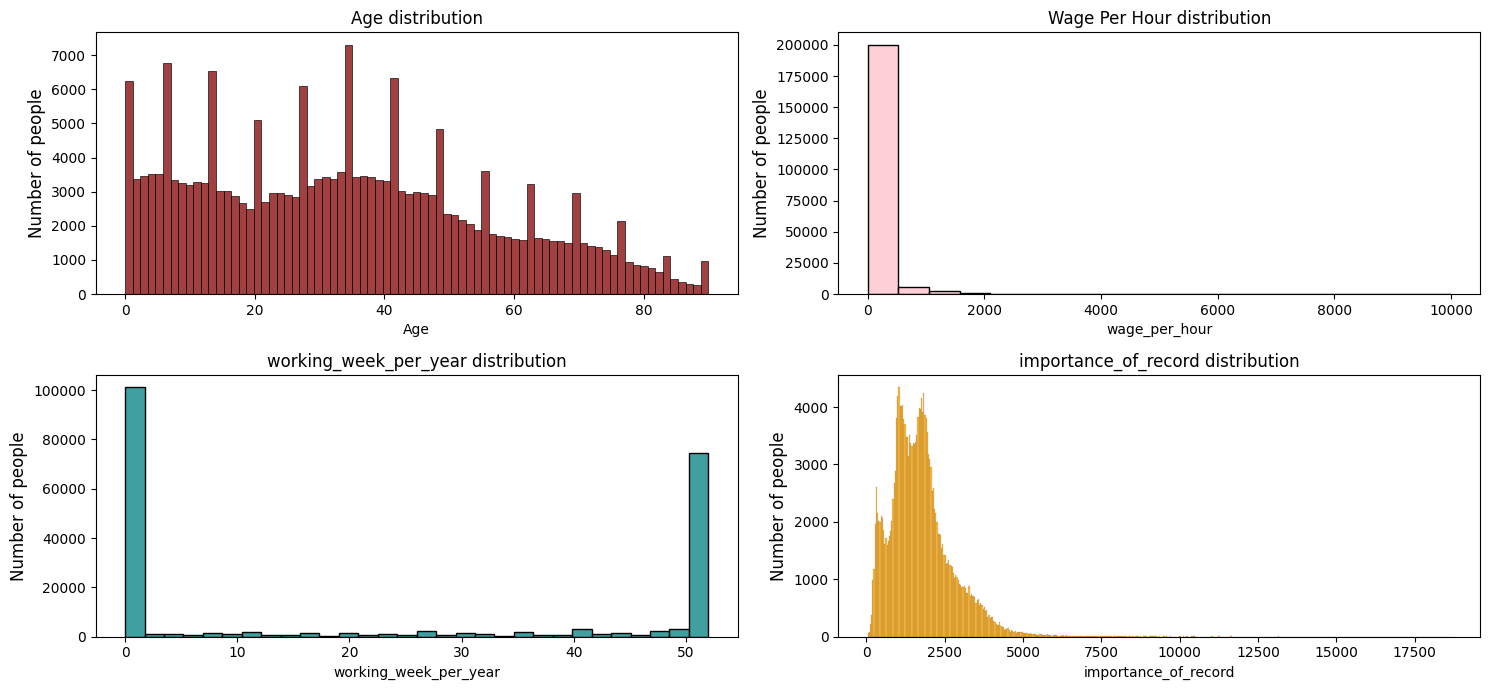

In [13]:
fig,axes =plt.subplots(2,2, figsize=(15,7))

# Age Distribution

sns.histplot(df['age'],color='maroon',ax=axes[0,0])
axes[0,0].set_title("Age distribution")
axes[0,0].set_xlabel('Age',fontsize=10)
axes[0, 0].set_ylabel('Number of people', fontsize=12)

#Wage Per Hour distribution
sns.histplot(df['wage_per_hour'],color='pink',ax=axes[0,1])
axes[0,1].set_title("Wage Per Hour distribution")
axes[0,1].set_xlabel('wage_per_hour',fontsize=10)
axes[0, 1].set_ylabel('Number of people', fontsize=12)

#working_week_per_year 
sns.histplot(df['working_week_per_year'],color='teal',ax=axes[1,0])
axes[1,0].set_title("working_week_per_year distribution")
axes[1,0].set_xlabel('working_week_per_year',fontsize=10)
axes[1,0].set_ylabel('Number of people', fontsize=12)


#importance_of_record 
sns.histplot(df['importance_of_record'],color='orange',ax=axes[1,1])
axes[1,1].set_title("importance_of_record distribution")
axes[1,1].set_xlabel('importance_of_record',fontsize=10)
axes[1,1].set_ylabel('Number of people', fontsize=12)


# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


* More data points less than 20 years indicates children are in the dataset.

In [14]:
len(df[df["age"]<=18])

61269

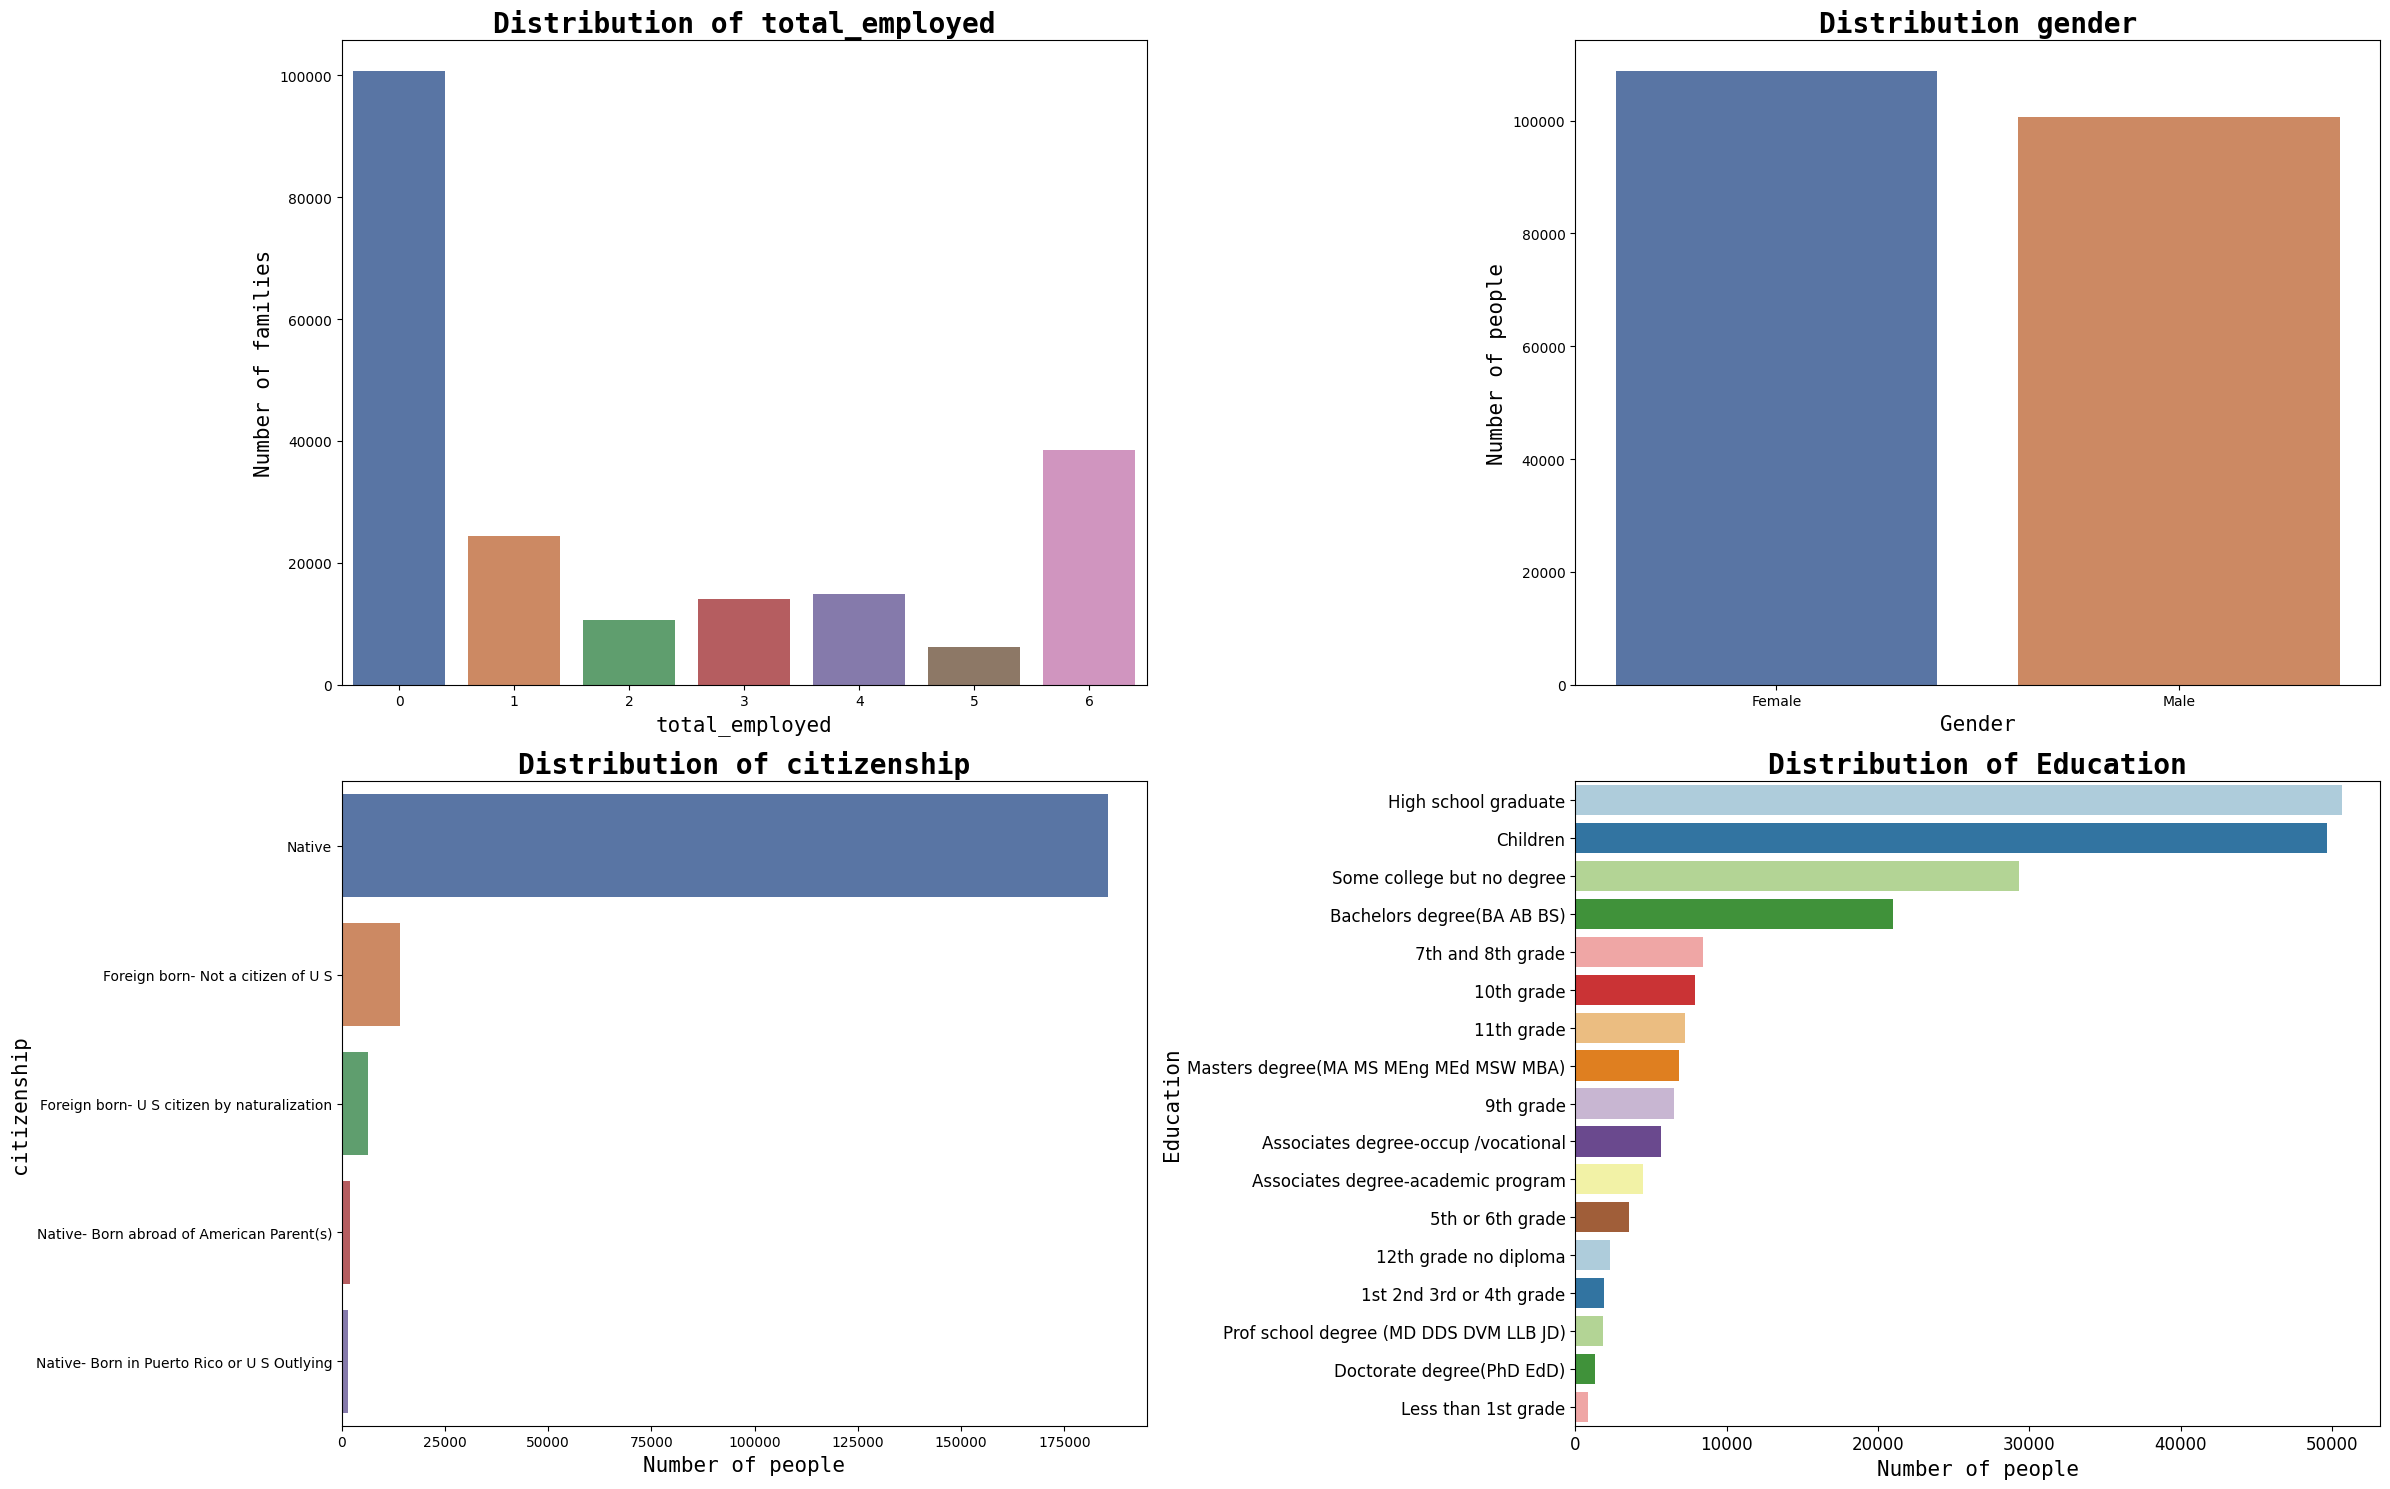

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(24, 15))

# Distribution of total_employed
total_employed = df['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='deep', ax=axs[0,0])
axs[0,0].set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,0].set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].tick_params(labelsize=10)

# Distribution of Income limit
income = df['gender'].value_counts()
sns.barplot(x=income.index, y=income.values, palette='deep', ax=axs[0,1])
axs[0,1].set_title('Distribution gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,1].set_xlabel('Gender', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].tick_params(labelsize=10)

citizenship = df['citizenship'].value_counts()
sns.barplot(y=citizenship.index,x=citizenship.values,palette='deep',ax=axs[1,0])
axs[1,0].set_title('Distribution of citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,0].set_ylabel('citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].tick_params(labelsize=10)

edu = df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired',ax=axs[1,1])
axs[1,1].set_title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].set_ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].tick_params(labelsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<div style="border-radius:10px; border: #301E67 solid; padding: 15px; background-color: #FCFFE7; font-size:100%; text-align:left">
<font color='#0080FF'>Question 1: Does education have any impact on income?</font>

In [16]:
edu_df = df.copy(deep=True)

edu_df['education'].value_counts()

High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree (MD DDS DVM LLB JD)     1852
Doctorate degree(PhD EdD)                  1318
Less than 1st grade                         829
Name: education, dtype: int64

<AxesSubplot: xlabel='count', ylabel='education'>

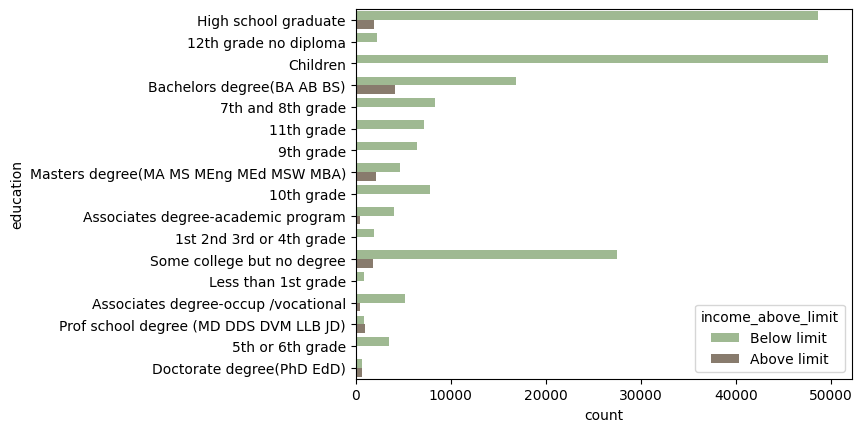

In [17]:
edu_df.replace({' 7th and 8th grade':'upto 12th',' Less than 1st grade':'upto 12th',' 1st 2nd 3rd or 4th grade':'upto 12th',
                ' 5th or 6th grade':'upto 12th',' 9th grade':'upto 12th',' 11th grade':'upto 12th',
                ' 10th grade':'upto 12th',' 12th grade no diploma':'upto 12th'},inplace=True)
custom_palette = {"Above limit": "#8D7B68", "Below limit": "#9DC08B"}
sns.countplot(data=edu_df,y="education",hue="income_above_limit",palette=custom_palette)

<div style="border-radius:10px; border:#F24C3D solid; padding: 15px; background-color: #22A699; font-size:100%; text-align:left">
<h3 align="left"><font color='#C70039'>💡 Observations:</font></h3>
    
* As per this dataset, Education doesn't have significant effect on salary    

<div style="border-radius:10px; border: #301E67 solid; padding: 15px; background-color: #FCFFE7; font-size:100%; text-align:left">
<font color='#0080FF'>Question 2: Does Native  have any impact on income?</font>

<AxesSubplot: xlabel='count', ylabel='citizenship'>

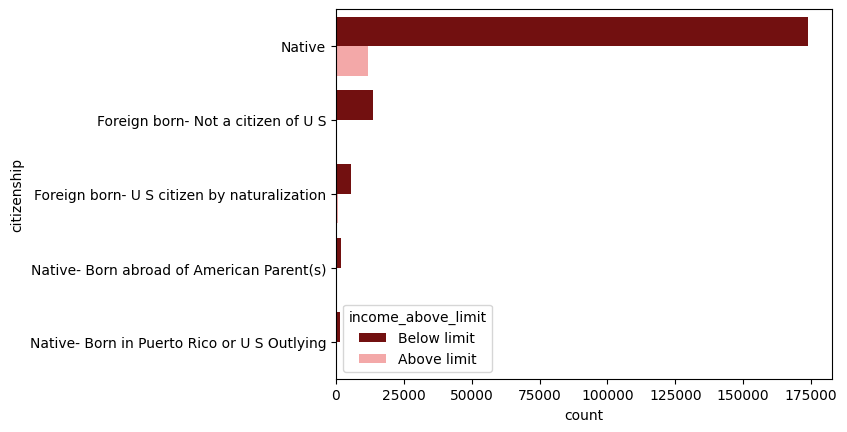

In [18]:
custom_palette = {"Above limit": "#FF9B9B", "Below limit": "#820000"}
sns.countplot(data=df,y="citizenship",hue="income_above_limit",palette=custom_palette)

<div style="border-radius:10px; border:#F24C3D solid; padding: 15px; background-color: #22A699; font-size:100%; text-align:left">
<h3 align="left"><font color='#C70039'>💡 Observations:</font></h3>
*As per this dataset, citizenship doesn't have significant effect on salary  

<div style="border-radius:10px; border: #301E67 solid; padding: 15px; background-color: #FCFFE7; font-size:100%; text-align:left">
<font color='#0080FF'>Question 3: Does Gender have any impact on income?</font>

<AxesSubplot: xlabel='gender', ylabel='count'>

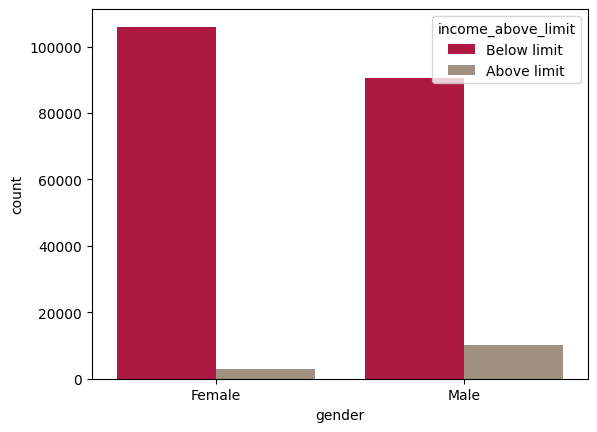

In [19]:
custom_palette = {"Above limit": "#A4907C", "Below limit": "#C70039"}
sns.countplot(data=df,x="gender",hue="income_above_limit",palette=custom_palette)

In [20]:
print("Male income above limit :",len(df.loc[(df["gender"]=="Male") & (df["income_above_limit"]=="Above limit")])/len(df.loc[(df["gender"]=="Male")])*100)
print("Female income above limit :",len(df.loc[(df["gender"]=="Female") & (df["income_above_limit"]=="Above limit")])/len(df.loc[(df["gender"]=="Female")])*100)
print("Male income Below limit :",len(df.loc[(df["gender"]=="Male") & (df["income_above_limit"]=="Below limit")])/len(df.loc[(df["gender"]=="Male")])*100)
print("Female income Below limit :",len(df.loc[(df["gender"]=="Female") & (df["income_above_limit"]=="Below limit")])/len(df.loc[(df["gender"]=="Female")])*100)

Male income above limit : 10.137516755200318
Female income above limit : 2.5628768936608326
Male income Below limit : 89.86248324479969
Female income Below limit : 97.43712310633916


<div style="border-radius:10px; border:#F24C3D solid; padding: 15px; background-color: #22A699; font-size:100%; text-align:left">
<h3 align="left"><font color='#C70039'>💡 Observations:</font></h3>
*Income above limit - Female percentage is below than Male
    
*Income Below limit - Female percentage is more than Male
    
*This clearly shows bias/discrimination against Female gender     

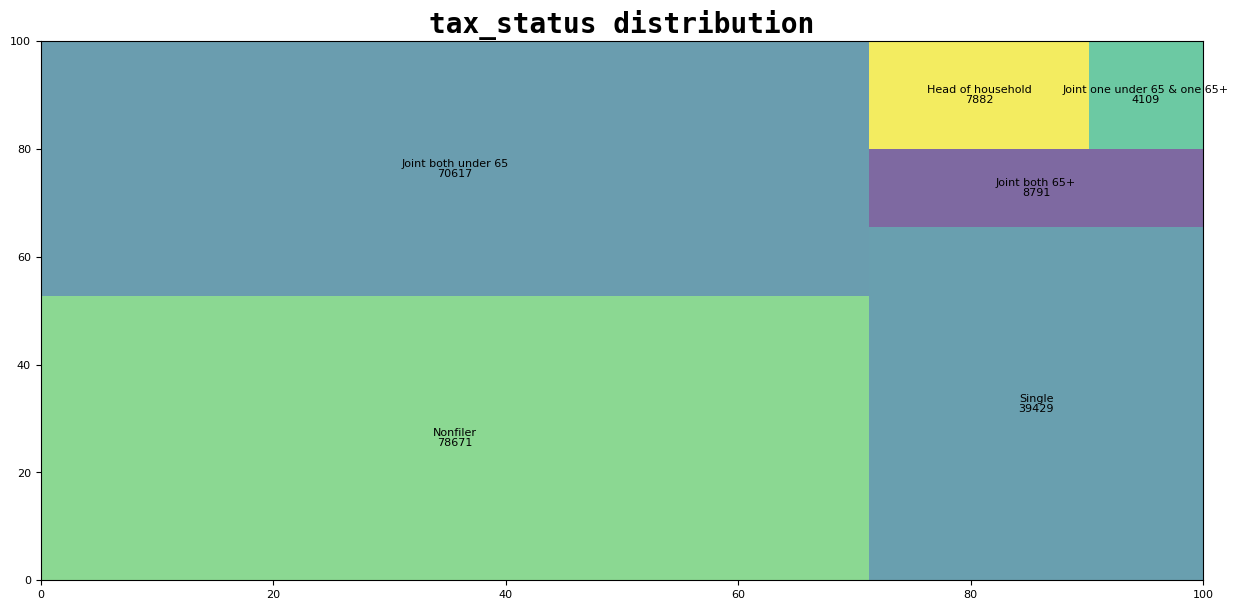

In [21]:
tax_status = df['tax_status'].value_counts()
plt.figure(figsize=(15, 7))
plt.rc('font', size=8)
squarify.plot(sizes=tax_status.values, label=tax_status.index, value=tax_status.values,alpha=0.7)
plt.title('tax_status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

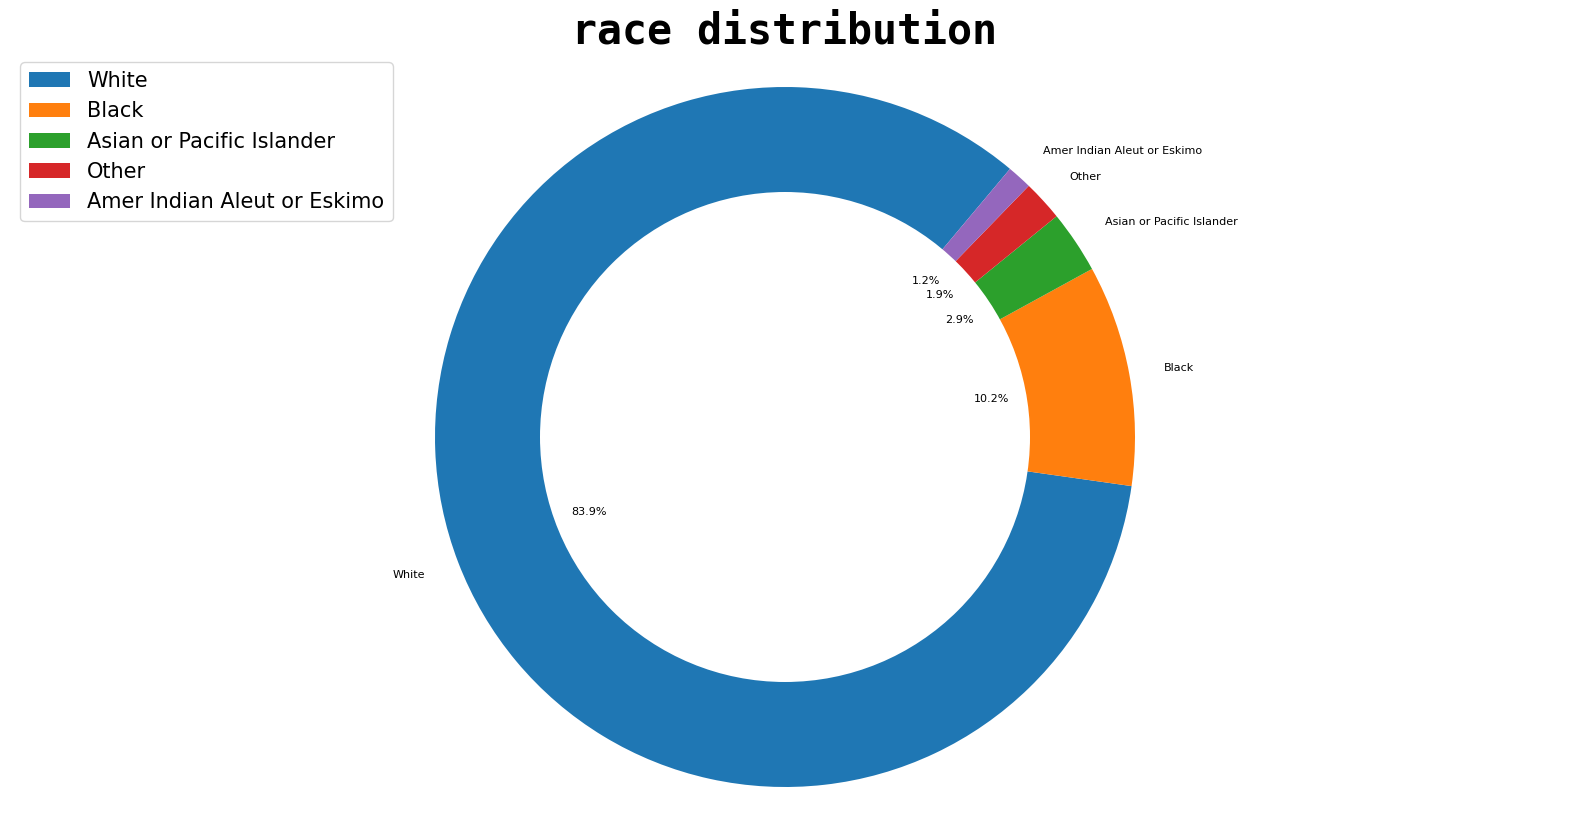

In [22]:
race = df['race'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(race.values, labels=race.index,startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.title('race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

<AxesSubplot: xlabel='count', ylabel='marital_status'>

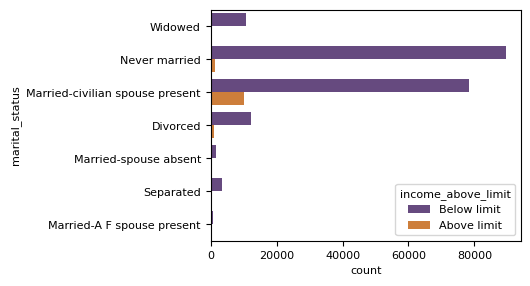

In [23]:
plt.figure(figsize=(4,3))
custom_palette = {"Above limit": "#E57C23", "Below limit": "#674188"}
sns.countplot(data=df, y='marital_status',hue="income_above_limit",palette=custom_palette)

<AxesSubplot: xlabel='count', ylabel='household_stat'>

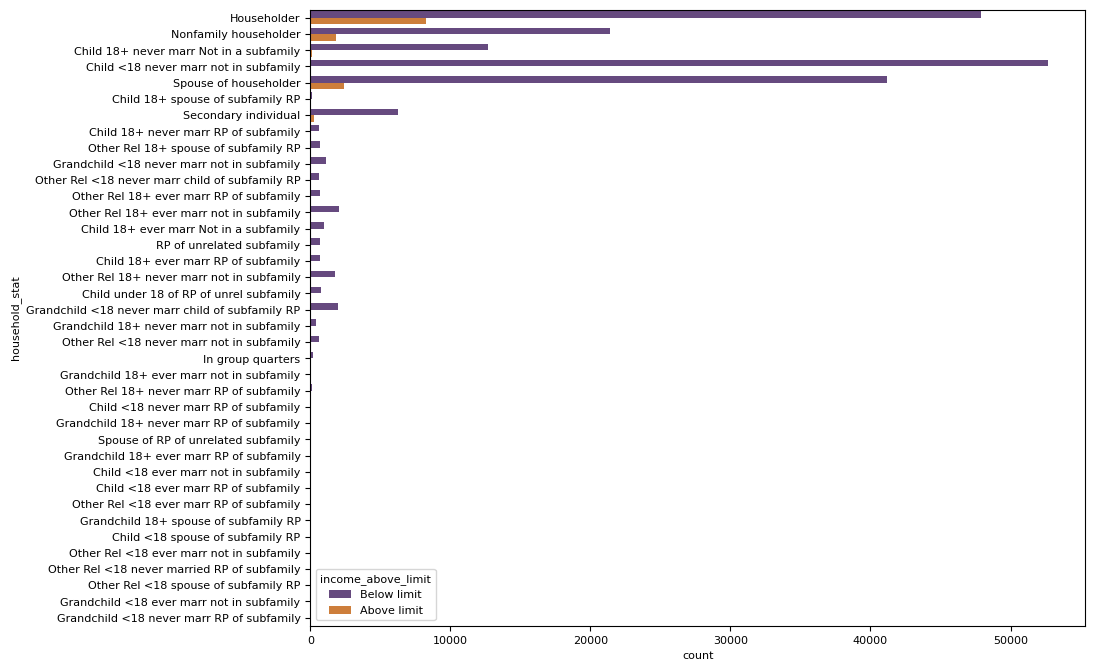

In [24]:
plt.figure(figsize=(10,8))
custom_palette = {"Above limit": "#E57C23", "Below limit": "#674188"}
sns.countplot(data=df, y='household_stat',hue="income_above_limit",palette=custom_palette)

<div style="border-radius:10px; border:#F24C3D solid; padding: 15px; background-color: #22A699; font-size:100%; text-align:left">
<h3 align="left"><font color='#C70039'>💡 Observations:</font></h3>

* Other than ['Householder','Nonfamily householder,'Spouse of householer','Secondary individual'] ,remaining values don't have any contriburtion to the target values. 
    
* It is suggested to club as 'others'

In [25]:
condition = ~df['household_stat'].isin(['Householder','Nonfamily householder','Spouse of householer','Secondary individual'])
df['updated_household_stat']=df['household_stat']
df.loc[condition,'updated_household_stat']='other'
df.drop(['household_stat'],inplace=True,axis=1)

In [26]:
#Moving the column to just before the target column and renaming as household_stat 
col_to_mov= df.pop('updated_household_stat')
df.insert(21,'household_stat',col_to_mov)

In [27]:
#sns.pairplot(df,vars=['age','floor_area','elevation'], hue='income_above_limit',height=4,plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},corner=True           );

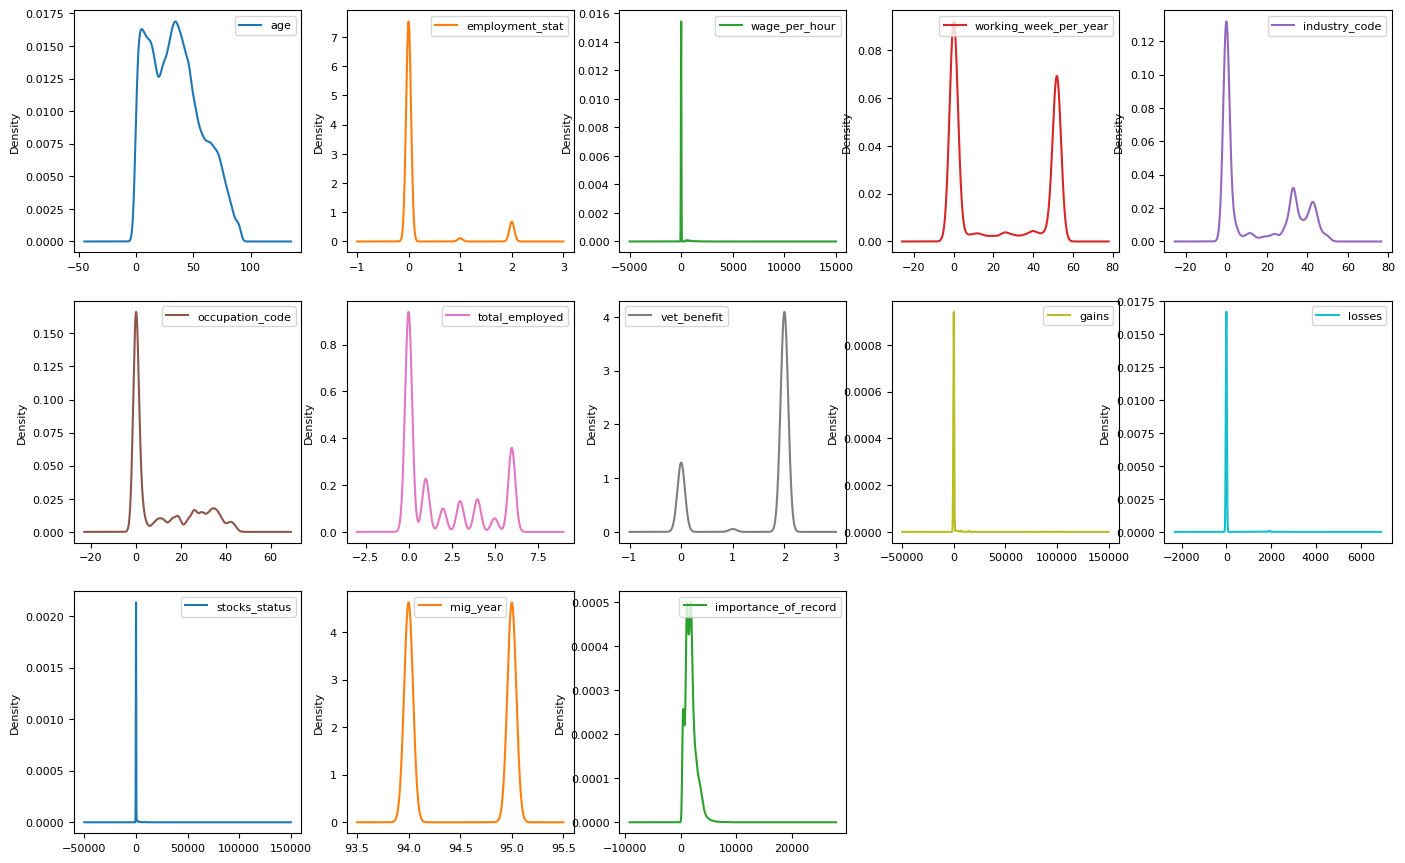

In [28]:
df.plot(kind="density", 
                subplots=True, 
                layout = (6,5), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

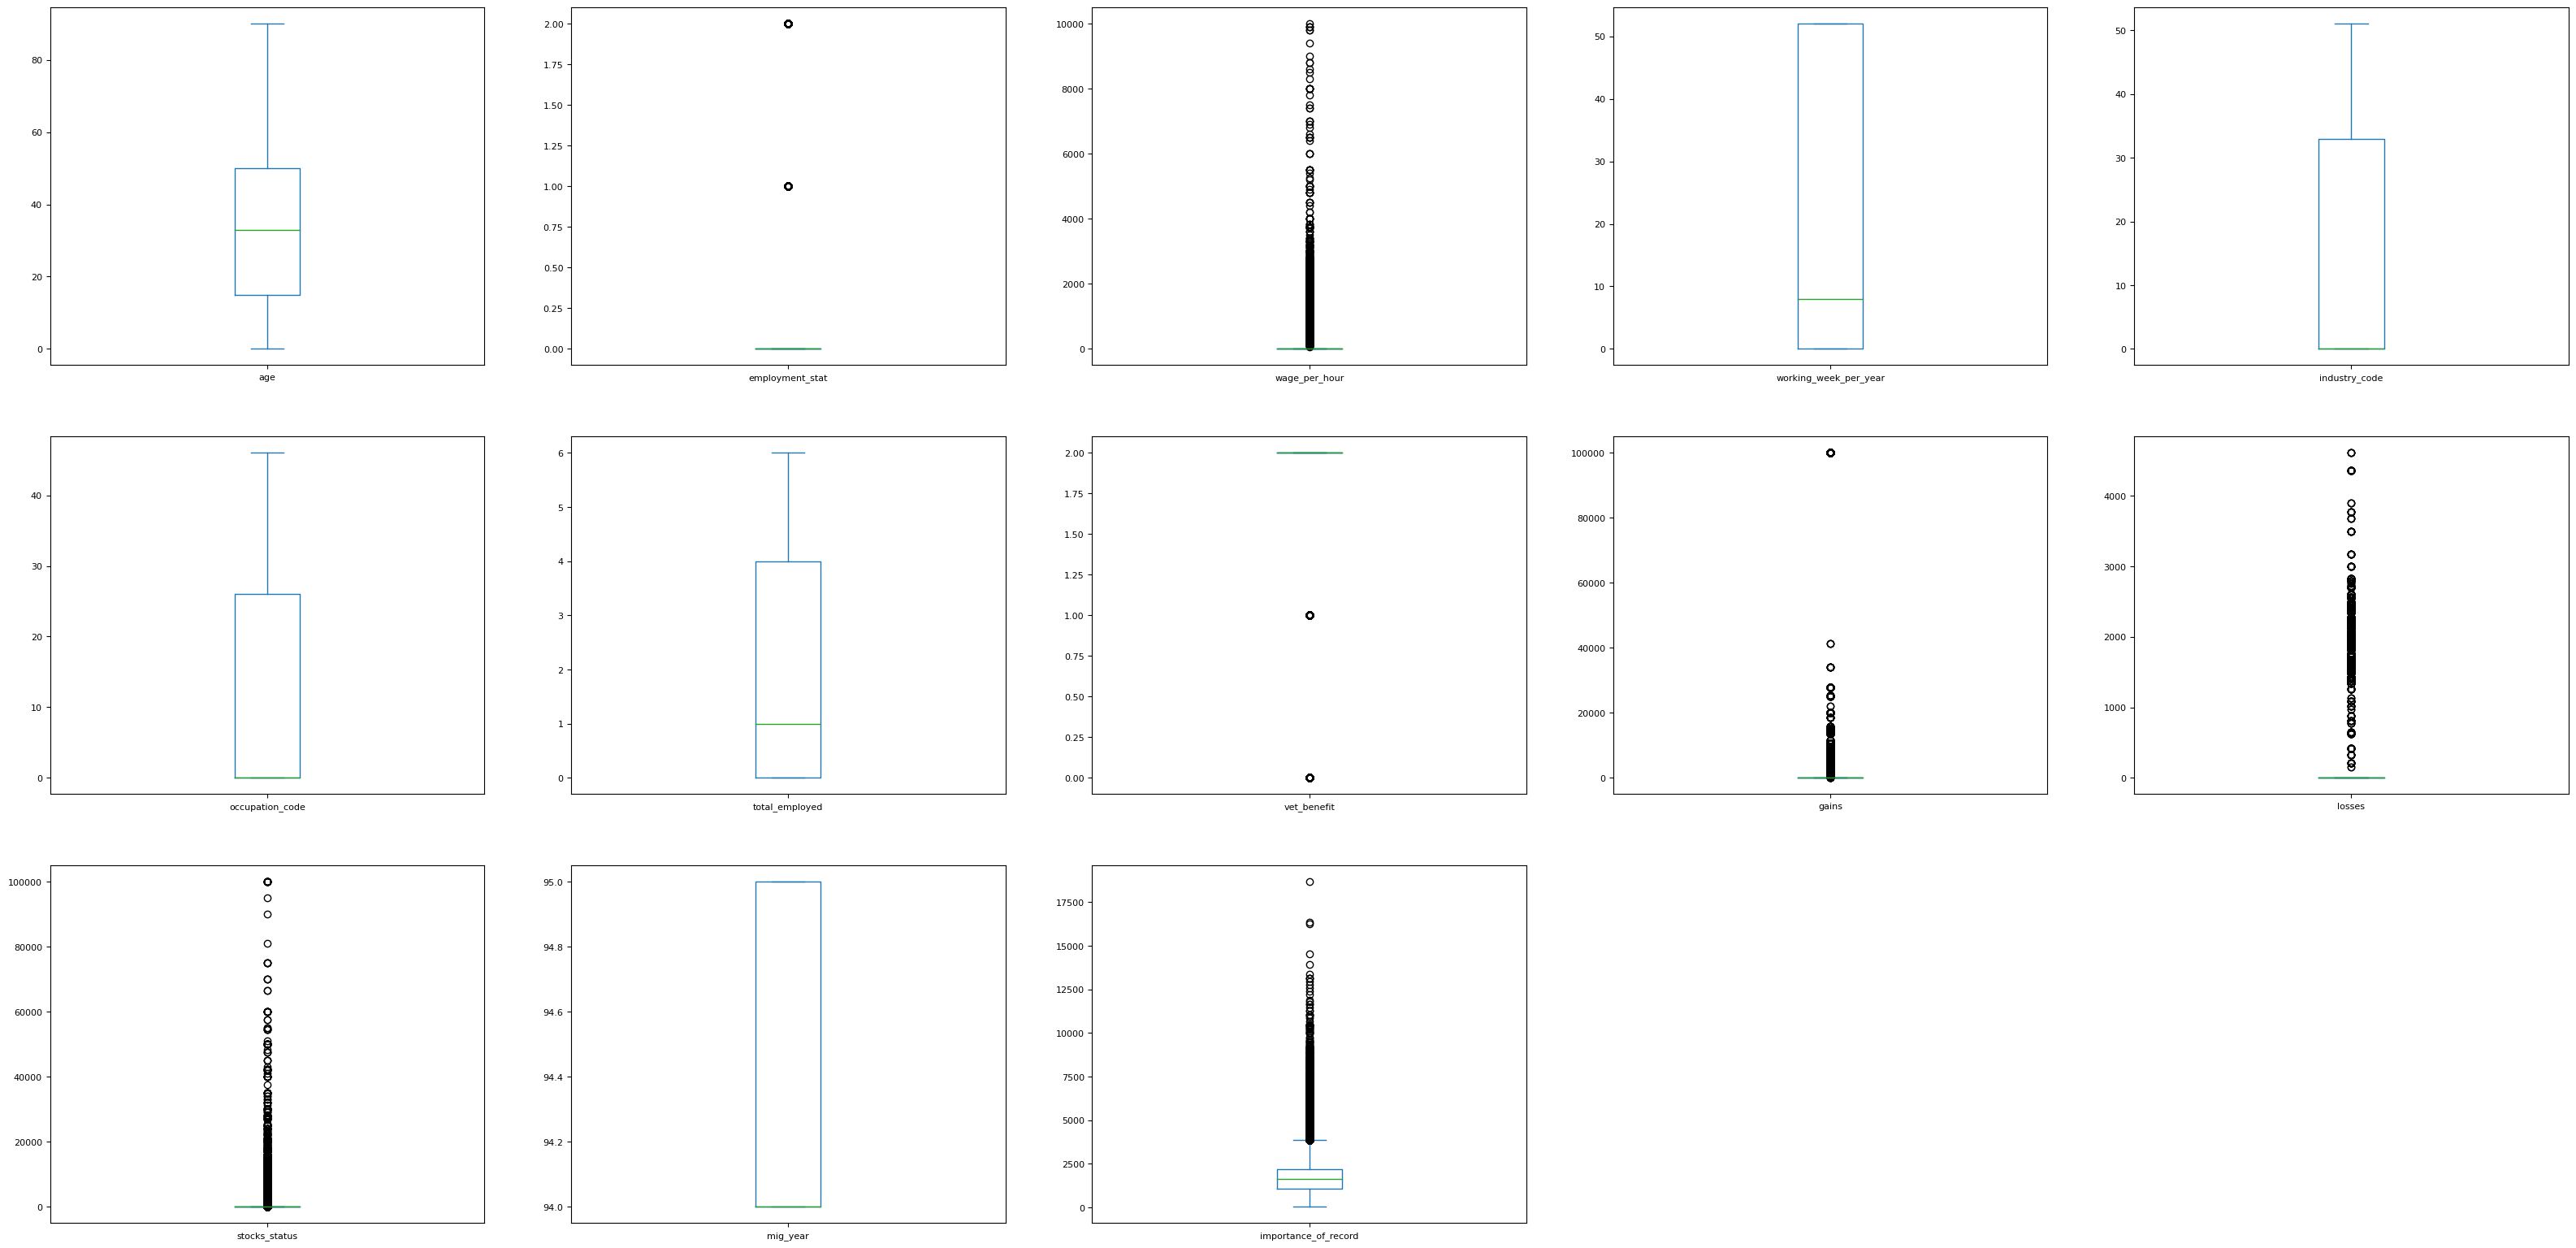

In [29]:
df.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,5), 
                figsize=(40,40), 
                sharex=False, 
                sharey=False);

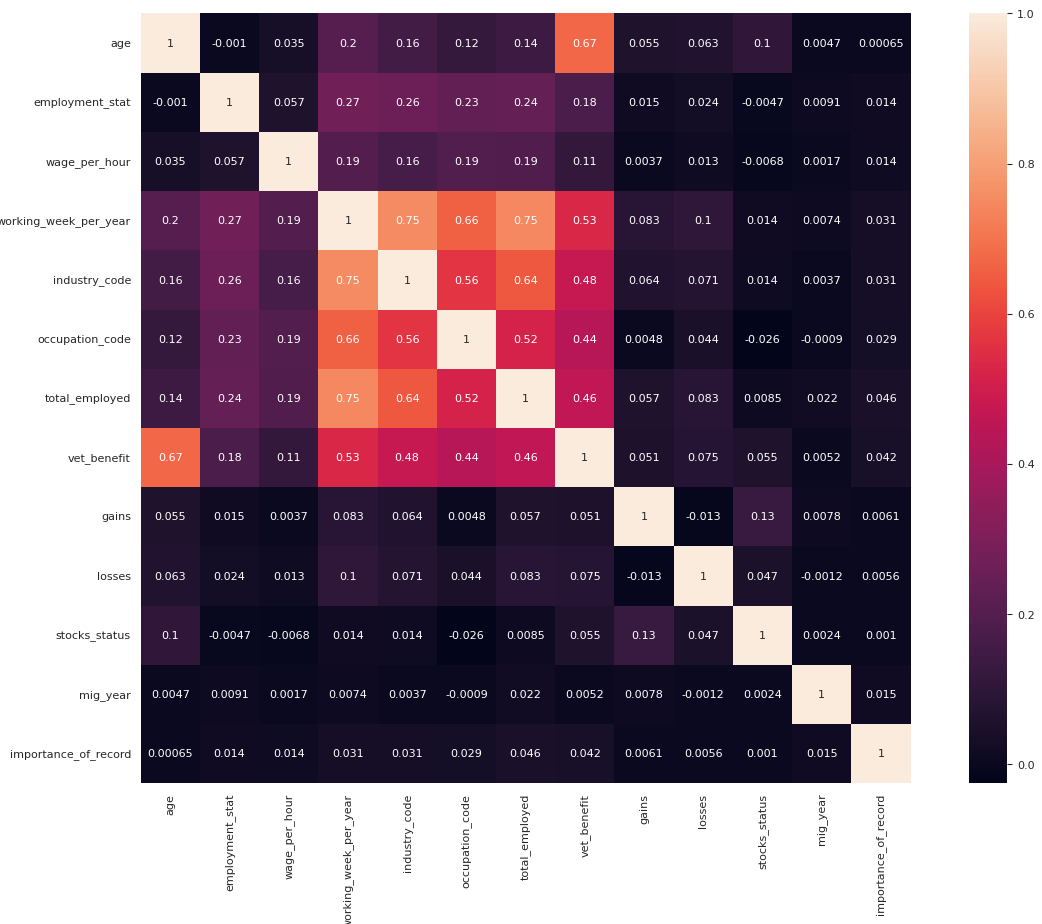

In [30]:
#corr = df.corr(method='pearson')
corr = df.corr()

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, square=True,annot=True)
plt.show()

<div style="border-radius:10px; border:#F24C3D solid; padding: 15px; background-color: #22A699; font-size:100%; text-align:left">
<h3 align="left"><font color='#C70039'>💡 Observations:</font></h3>

* Based on the descriptive statistics,distribution,boxplot & correlation analysis on Numerical columns ,we can suggest to remove the Employee_stat,Mig_year & vet_benefit column as it doesn't have any variance in data.
    

In [31]:
df.drop(["employment_stat","mig_year","vet_benefit"],inplace=True,axis=1)

<div style="border-radius:10px; border: #301E67 solid; padding: 15px; background-color: #FCFFE7; font-size:100%; text-align:left">
<font color='#0080FF'>Perform Chi-Square statistics to identify the correlation between Categorical value and target columns</font>

In [32]:
categorical_col = df.select_dtypes(include = ['object','category']).columns.tolist()
cat_corr=[] # This captures significant categorical columns
for col in categorical_col[0:-1]:
    contingency_table = pd.crosstab(df[col], df['income_above_limit'])

    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Print the results
    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected frequencies table:")
    print(expected)
    alpha = 0.05
    if p < alpha:
        cat_corr.append(col)
        print(f"There is a significant association between {col} and income_above_limit.")
    else:
        print(f"There is no significant association between {col} and income_above_limit.")
    print("________________________________________________________________________________")    

Chi-square statistic: 5154.827952374376
P-value: 0.0
Degrees of freedom: 1
Expected frequencies table:
[[  6749.31351462 102034.68648538]
 [  6248.68648538  94466.31351462]]
There is a significant association between gender and income_above_limit.
________________________________________________________________________________
Chi-square statistic: 32023.58134968222
P-value: 0.0
Degrees of freedom: 16
Expected frequencies table:
[[  490.45193533  7414.54806467]
 [  450.43403548  6809.56596452]
 [  141.58270923  2140.41729077]
 [  118.93692094  1798.06307906]
 [  219.75721125  3322.24278875]
 [  523.52099055  7914.47900945]
 [  405.76289147  6134.23710853]
 [  278.82239056  4215.17760944]
 [  350.54439401  5299.45560599]
 [ 1301.60545874 19677.39454126]
 [ 3082.61915331 46602.38084669]
 [   81.77301085  1236.22698915]
 [ 3141.06390007 47485.93609993]
 [   51.43385887   777.56614113]
 [  425.67877651  6435.32122349]
 [  114.90410933  1737.09589067]
 [ 1819.1082535  27500.8917465 ]]
There

<div style="border-radius:10px; border:#F24C3D solid; padding: 15px; background-color: #22A699; font-size:100%; text-align:left">
<h3 align="left"><font color='#C70039'>💡 Observations:</font></h3>
    
* Retaining all the categorical columns as the p value shows significance to target column    
    

### <span style="font-family:cursive;text-align:center">Treating imbalance in the dataset using Oversampling</span> 

In [33]:
x,y = df.drop(['income_above_limit'],axis=1),df['income_above_limit']
df.shape

(209499, 22)

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

In [35]:
print('The class Imbalance in the data is given below')
print(Y_random_resampled.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_random_resampled.value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
Below limit    196501
Above limit    196501
Name: income_above_limit, dtype: int64 

The class imbalance in terms of percentage is given below 
Below limit    50.0
Above limit    50.0
Name: income_above_limit, dtype: float64


###  <span style="font-family:cursive;text-align:center">Creating a train test split</span>

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=42)

In [37]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (314401, 21)
X_test shape: (78601, 21)
Y_train shape: (314401,)
Y_test shape: (78601,)


### Encoding categorical values using OneHotEncoder

In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = encoder.fit_transform(X_train[cat_corr])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(cat_corr))
encoded_df.reset_index(drop=True,inplace=True)



### Standardization of Numerical values

In [39]:
from sklearn.preprocessing import StandardScaler
num_col = X_train.drop(cat_corr,axis=1).columns
scaler = StandardScaler()
scaled_num_col = scaler.fit_transform(X_train[num_col])
scaled_df = pd.DataFrame(scaled_num_col, columns=scaler.get_feature_names_out(num_col))
scaled_df.reset_index(drop=True,inplace=True)

In [40]:
X_train_encoded = pd.concat([scaled_df,encoded_df], axis=1)

In [41]:
X_train_encoded.tail()

,age,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,gains,losses,stocks_status,importance_of_record,gender_Female,gender_Male,education_10th grade,education_11th grade,education_12th grade no diploma,education_1st 2nd 3rd or 4th grade,education_5th or 6th grade,education_7th and 8th grade,education_9th grade,education_Associates degree-academic program,education_Associates degree-occup /vocational,education_Bachelors degree(BA AB BS),education_Children,education_Doctorate degree(PhD EdD),education_High school graduate,education_Less than 1st grade,education_Masters degree(MA MS MEng MEd MSW MBA),education_Prof school degree (MD DDS DVM LLB JD),education_Some college but no degree,marital_status_Divorced,marital_status_Married-A F spouse present,marital_status_Married-civilian spouse present,marital_status_Married-spouse absent,marital_status_Never married,marital_status_Separated,marital_status_Widowed,race_Amer Indian Aleut or Eskimo,race_Asian or Pacific Islander,race_Black,race_Other,race_White,is_hispanic_All other,is_hispanic_Central or South American,is_hispanic_Chicano,is_hispanic_Cuban,is_hispanic_Do not know,is_hispanic_Mexican (Mexicano),is_hispanic_Mexican-American,is_hispanic_NA,is_hispanic_Other Spanish,is_hispanic_Puerto Rican,employment_commitment_Children or Armed Forces,employment_commitment_Full-time schedules,employment_commitment_Not in labor force,employment_commitment_PT for econ reasons usually FT,employment_commitment_PT for econ reasons usually PT,employment_commitment_PT for non-econ reasons usually FT,employment_commitment_Unemployed full-time,employment_commitment_Unemployed part- time,industry_code_main_Agriculture,industry_code_main_Armed Forces,industry_code_main_Business and repair services,industry_code_main_Communications,industry_code_main_Construction,industry_code_main_Education,industry_code_main_Entertainment,industry_code_main_Finance insurance and real estate,industry_code_main_Forestry and fisheries,industry_code_main_Hospital services,industry_code_main_Manufacturing-durable goods,industry_code_main_Manufacturing-nondurable goods,industry_code_main_Medical except hospital,industry_code_main_Mining,industry_code_main_Not in universe or children,industry_code_main_Other professional services,industry_code_main_Personal services except private HH,industry_code_main_Private household services,industry_code_main_Public administration,industry_code_main_Retail trade,industry_code_main_Social services,industry_code_main_Transportation,industry_code_main_Utilities and sanitary services,industry_code_main_Wholesale trade,household_summary_Child 18 or older,household_summary_Child under 18 ever married,household_summary_Child under 18 never married,household_summary_Group Quarters- Secondary individual,household_summary_Householder,household_summary_Nonrelative of householder,household_summary_Other relative of householder,household_summary_Spouse of householder,tax_status_Head of household,tax_status_Joint both 65+,tax_status_Joint both under 65,tax_status_Joint one under 65 & one 65+,tax_status_Nonfiler,tax_status_Single,citizenship_Foreign born- Not a citizen of U S,citizenship_Foreign born- U S citizen by naturalization,citizenship_Native,citizenship_Native- Born abroad of American Parent(s),citizenship_Native- Born in Puerto Rico or U S Outlying,household_stat_Householder,household_stat_Nonfamily householder,household_stat_Secondary individual,household_stat_other
314396,-0.001510,-0.18722,0.738040,0.675718,0.392982,-0.776738,-0.203152,-0.237933,-0.137584,0.555462,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
314397,-0.42077

In [42]:
encoded_columns = encoder.transform(X_test[cat_corr])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(cat_corr))
encoded_df.reset_index(drop=True,inplace=True)

scaled_num_col = scaler.fit_transform(X_test[num_col])
scaled_df = pd.DataFrame(scaled_num_col, columns=scaler.get_feature_names_out(num_col))
scaled_df.reset_index(drop=True,inplace=True)

X_test_encoded = pd.concat([scaled_df,encoded_df], axis=1)

X_test_encoded.tail()

,age,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,gains,losses,stocks_status,importance_of_record,gender_Female,gender_Male,education_10th grade,education_11th grade,education_12th grade no diploma,education_1st 2nd 3rd or 4th grade,education_5th or 6th grade,education_7th and 8th grade,education_9th grade,education_Associates degree-academic program,education_Associates degree-occup /vocational,education_Bachelors degree(BA AB BS),education_Children,education_Doctorate degree(PhD EdD),education_High school graduate,education_Less than 1st grade,education_Masters degree(MA MS MEng MEd MSW MBA),education_Prof school degree (MD DDS DVM LLB JD),education_Some college but no degree,marital_status_Divorced,marital_status_Married-A F spouse present,marital_status_Married-civilian spouse present,marital_status_Married-spouse absent,marital_status_Never married,marital_status_Separated,marital_status_Widowed,race_Amer Indian Aleut or Eskimo,race_Asian or Pacific Islander,race_Black,race_Other,race_White,is_hispanic_All other,is_hispanic_Central or South American,is_hispanic_Chicano,is_hispanic_Cuban,is_hispanic_Do not know,is_hispanic_Mexican (Mexicano),is_hispanic_Mexican-American,is_hispanic_NA,is_hispanic_Other Spanish,is_hispanic_Puerto Rican,employment_commitment_Children or Armed Forces,employment_commitment_Full-time schedules,employment_commitment_Not in labor force,employment_commitment_PT for econ reasons usually FT,employment_commitment_PT for econ reasons usually PT,employment_commitment_PT for non-econ reasons usually FT,employment_commitment_Unemployed full-time,employment_commitment_Unemployed part- time,industry_code_main_Agriculture,industry_code_main_Armed Forces,industry_code_main_Business and repair services,industry_code_main_Communications,industry_code_main_Construction,industry_code_main_Education,industry_code_main_Entertainment,industry_code_main_Finance insurance and real estate,industry_code_main_Forestry and fisheries,industry_code_main_Hospital services,industry_code_main_Manufacturing-durable goods,industry_code_main_Manufacturing-nondurable goods,industry_code_main_Medical except hospital,industry_code_main_Mining,industry_code_main_Not in universe or children,industry_code_main_Other professional services,industry_code_main_Personal services except private HH,industry_code_main_Private household services,industry_code_main_Public administration,industry_code_main_Retail trade,industry_code_main_Social services,industry_code_main_Transportation,industry_code_main_Utilities and sanitary services,industry_code_main_Wholesale trade,household_summary_Child 18 or older,household_summary_Child under 18 ever married,household_summary_Child under 18 never married,household_summary_Group Quarters- Secondary individual,household_summary_Householder,household_summary_Nonrelative of householder,household_summary_Other relative of householder,household_summary_Spouse of householder,tax_status_Head of household,tax_status_Joint both 65+,tax_status_Joint both under 65,tax_status_Joint one under 65 & one 65+,tax_status_Nonfiler,tax_status_Single,citizenship_Foreign born- Not a citizen of U S,citizenship_Foreign born- U S citizen by naturalization,citizenship_Native,citizenship_Native- Born abroad of American Parent(s),citizenship_Native- Born in Puerto Rico or U S Outlying,household_stat_Householder,household_stat_Nonfamily householder,household_stat_Secondary individual,household_stat_other
78596,1.148260,-0.186218,0.744567,0.353787,2.037668,1.248625,-0.201013,-0.235262,-0.166399,-0.146314,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
78597,-0.053726,

In [43]:
Y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
Y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

# <span style="font-family:cursive;text-align:center">📊 Model Building</span>

### <span style="font-family:cursive;text-align:center">Random Forest Classifier 🌲🌲🌲</span>

In [44]:
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train_encoded, Y_train)

RandomForestClassifier(random_state=42)

In [45]:
Y_pred_ran_for = ran_for.predict(X_test_encoded)

In [46]:
print('Random Forest Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for), 2))

Random Forest Classifier:
F1 score: 0.98


In [47]:
print(classification_report(Y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     39578
           1       0.97      0.98      0.98     39023

    accuracy                           0.98     78601
   macro avg       0.98      0.98      0.98     78601
weighted avg       0.98      0.98      0.98     78601



In [48]:
xgb = XGBClassifier()
xgb.fit(X_train_encoded, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
Y_pred_xgb = xgb.predict(X_test_encoded)

In [50]:
print('XGB Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb), 2))

XGB Classifier:
F1 score: 0.89


In [51]:
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     39578
           1       0.87      0.91      0.89     39023

    accuracy                           0.89     78601
   macro avg       0.89      0.89      0.89     78601
weighted avg       0.89      0.89      0.89     78601



<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Very good accuracy on Random forest model as compared to XGB. But lets see how Random forest is working better?

In [52]:
import evidently
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently.pipeline.column_mapping import ColumnMapping

In [53]:
train_probas = pd.DataFrame(ran_for.predict_proba(X_train_encoded))
train_probas.columns = ['Below limit', 'Above limit']

test_probas = pd.DataFrame(ran_for.predict_proba(X_test_encoded))
test_probas.columns = ['Below limit', 'Above limit']

In [54]:
train_data,test_data = X_train_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [55]:
train_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_train]
test_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_pred_ran_for]
rf_merged_train = pd.concat([train_data, train_probas], axis = 1)
rf_merged_test = pd.concat([test_data, test_probas], axis = 1)

In [56]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [57]:
classification_performance_report = Report(metrics=[ClassificationPreset(),])

In [58]:
classification_performance_report.run(reference_data=rf_merged_train, current_data=rf_merged_test, column_mapping = column_mapping)
classification_performance_report.save_html('rf_model.html')

### <span style="font-family:cursive;text-align:center">Random Forest Train 🌲🌲🌲 vs XGB Classifier 🌲🎄🌳🌴 </span>

In [59]:
rf_test_probas = pd.DataFrame(ran_for.predict_proba(X_test_encoded))
rf_test_probas.columns = ['Below limit', 'Above limit']

xgb_test_probas = pd.DataFrame(xgb.predict_proba(X_test_encoded))
xgb_test_probas.columns = ['Below limit', 'Above limit']

In [60]:
rf_data,xgb_data = X_test_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [61]:
rf_data.reset_index(inplace=True, drop=True)
rf_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_final_data = pd.concat([rf_data, rf_test_probas], axis = 1)

xgb_data.reset_index(inplace=True, drop=True)
xgb_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
xgb_final_data = pd.concat([xgb_data, xgb_test_probas], axis = 1)

In [62]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=xgb_final_data, current_data=rf_final_data, column_mapping = column_mapping)
classification_performance_report.save_html('rf_vs_xgb.html')

<div style="border-radius:10px; border:#F24C3D solid; padding: 15px; background-color: #22A699; font-size:100%; text-align:left">
<h3 align="left"><font color='#C70039'>💡 Observations:</font></h3>

* As the model F1 score of Random Forest is better than the xgboost .We go with Random forest model.   

1   occupation_code: 0.1106
2   age: 0.0919
3   working_week_per_year: 0.0857
4   importance_of_record: 0.0664
5   stocks_status: 0.0626
6   total_employed: 0.0590
7   industry_code: 0.0567
8   gains: 0.0324
9   tax_status_Nonfiler: 0.0280
10   gender_Male: 0.0255
11   household_summary_Householder: 0.0202
12   marital_status_Never married: 0.0198
13   industry_code_main_Not in universe or children: 0.0194
14   household_stat_Householder: 0.0190
15   household_stat_other: 0.0182
16   gender_Female: 0.0168
17   marital_status_Married-civilian spouse present: 0.0162
18   education_Bachelors degree(BA AB BS): 0.0161
19   education_High school graduate: 0.0136
20   education_Masters degree(MA MS MEng MEd MSW MBA): 0.0123
21   losses: 0.0115
22   tax_status_Joint both under 65: 0.0111
23   wage_per_hour: 0.0097
24   employment_commitment_Children or Armed Forces: 0.0082
25   household_summary_Child under 18 never married: 0.0081
26   employment_commitment_Full-time schedules: 0.0078
27   ed

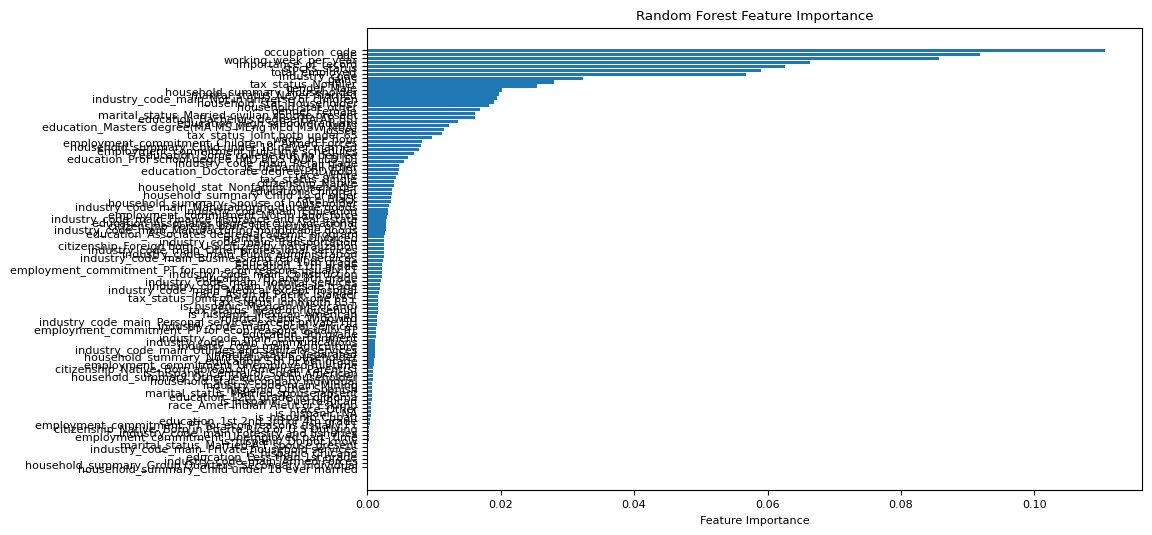

In [101]:
# Get feature importances from the model
feature_importances = ran_for.feature_importances_

# Sort the feature importances in descending order and get the corresponding feature names
sorted_feature_importances = sorted(zip(feature_importances,X_train_encoded.columns), reverse=True)

# Print or visualize feature importances
count=0
for importance, feature_name in sorted_feature_importances:
    print(count+1 ," " ,f"{feature_name}: {importance:.4f}")
    count=count+1

# Plot feature importances (optional)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), [importance for importance, _ in sorted_feature_importances], align='center')
plt.yticks(range(len(sorted_feature_importances)), [feature_name for _, feature_name in sorted_feature_importances])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

In [63]:
import joblib
joblib.dump(ran_for,'rf_model.joblib')

['rf_model.joblib']

### <span style="font-family:cursive;text-align:center">Explainable AI</span>

In [64]:
import shap

In [65]:
shap.initjs()


In [66]:
sample_set = X_train_encoded.sample(10)

In [67]:
explainer = shap.Explainer(ran_for)

In [82]:
shap_values = shap.TreeExplainer(ran_for).shap_values(sample_set)


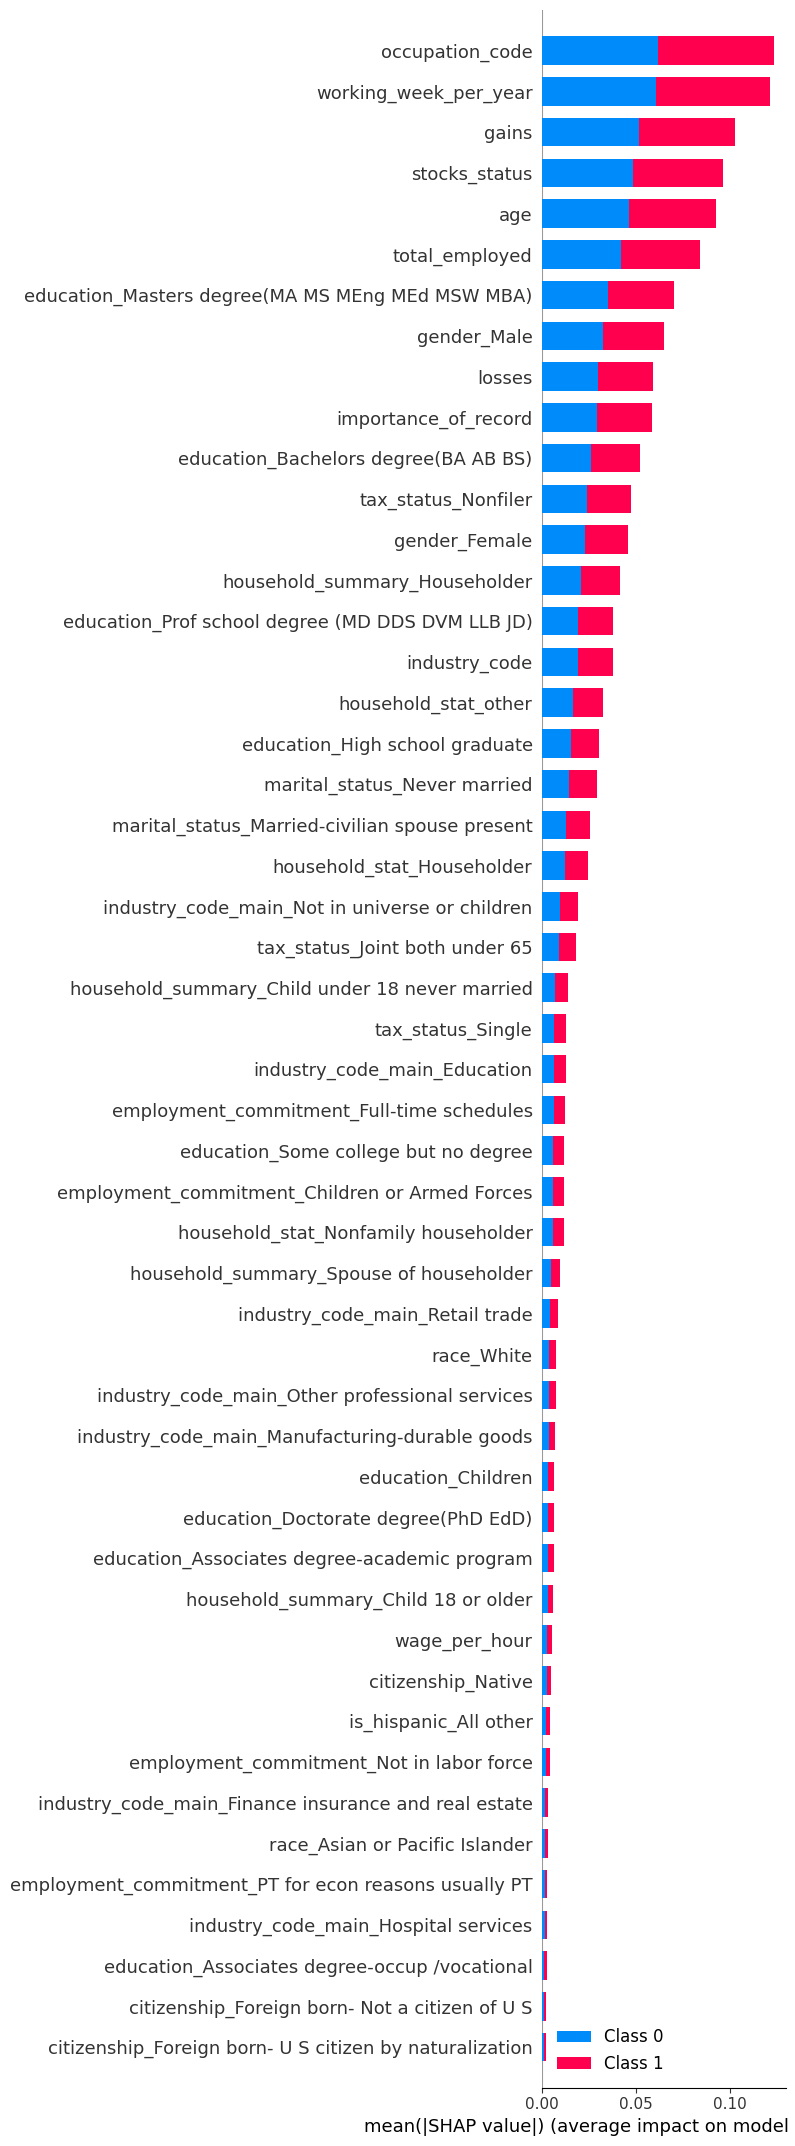

In [84]:
shap.summary_plot(shap_values, sample_set, max_display=50)

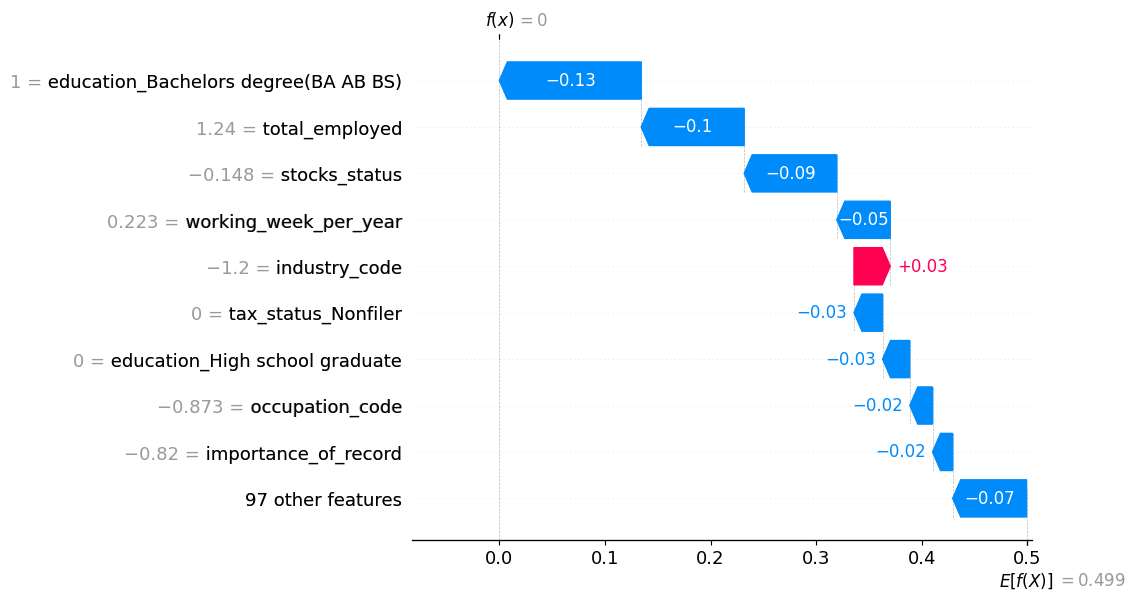

In [92]:
row = 4

shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(ran_for).expected_value[0], data=sample_set.iloc[row],  
                                         feature_names=sample_set.columns.tolist()))

In [68]:
shap_values_beeswarm = explainer(sample_set,check_additivity=False)

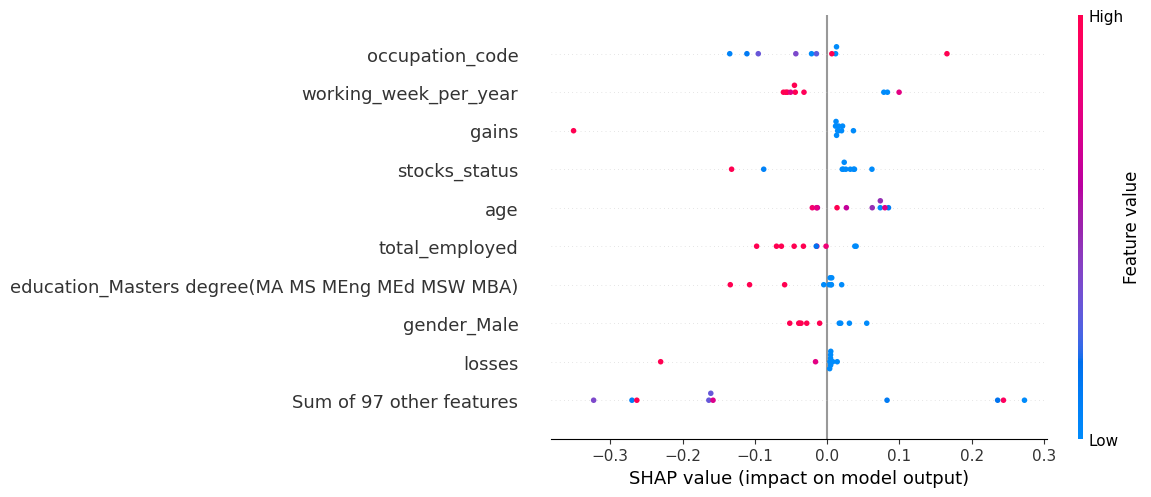

In [69]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,0])

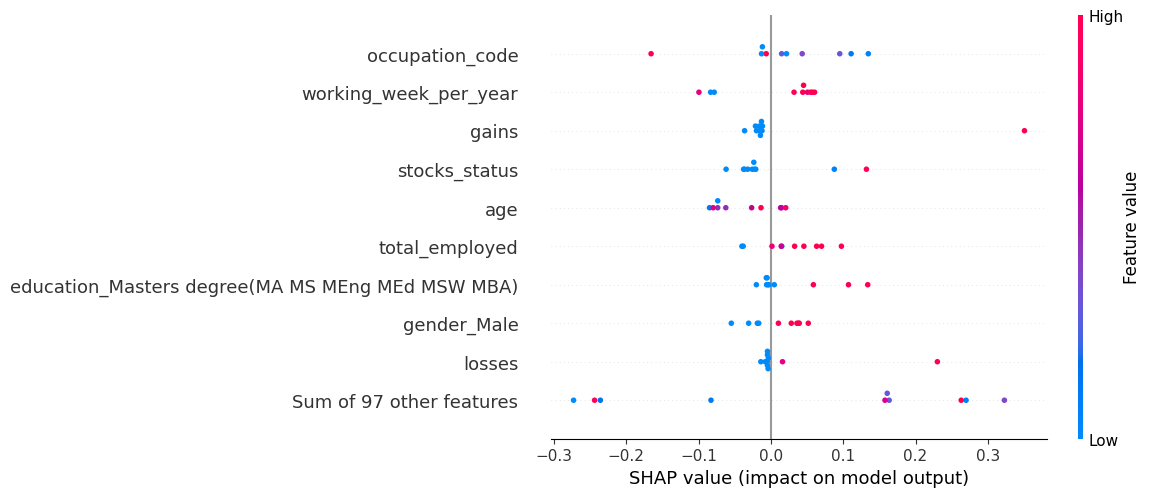

In [70]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,1])

In [95]:
choosen_instance = sample_set.iloc[3,:]
shap_values_fp = explainer.shap_values(choosen_instance)

In [96]:
shap.force_plot(explainer.expected_value[1], shap_values_fp[1], choosen_instance)

In [97]:
shap.force_plot(explainer.expected_value[0], shap_values_fp[0], choosen_instance)

In [74]:
choosen_instance2 = sample_set.iloc[0:5,:]
shap_values_fp_2 = explainer.shap_values(choosen_instance2)

In [75]:
shap.force_plot(explainer.expected_value[0], shap_values_fp_2[0], choosen_instance2,plot_cmap="DrDb")

In [76]:
shap.force_plot(explainer.expected_value[1], shap_values_fp_2[1], choosen_instance2,plot_cmap="DrDb")

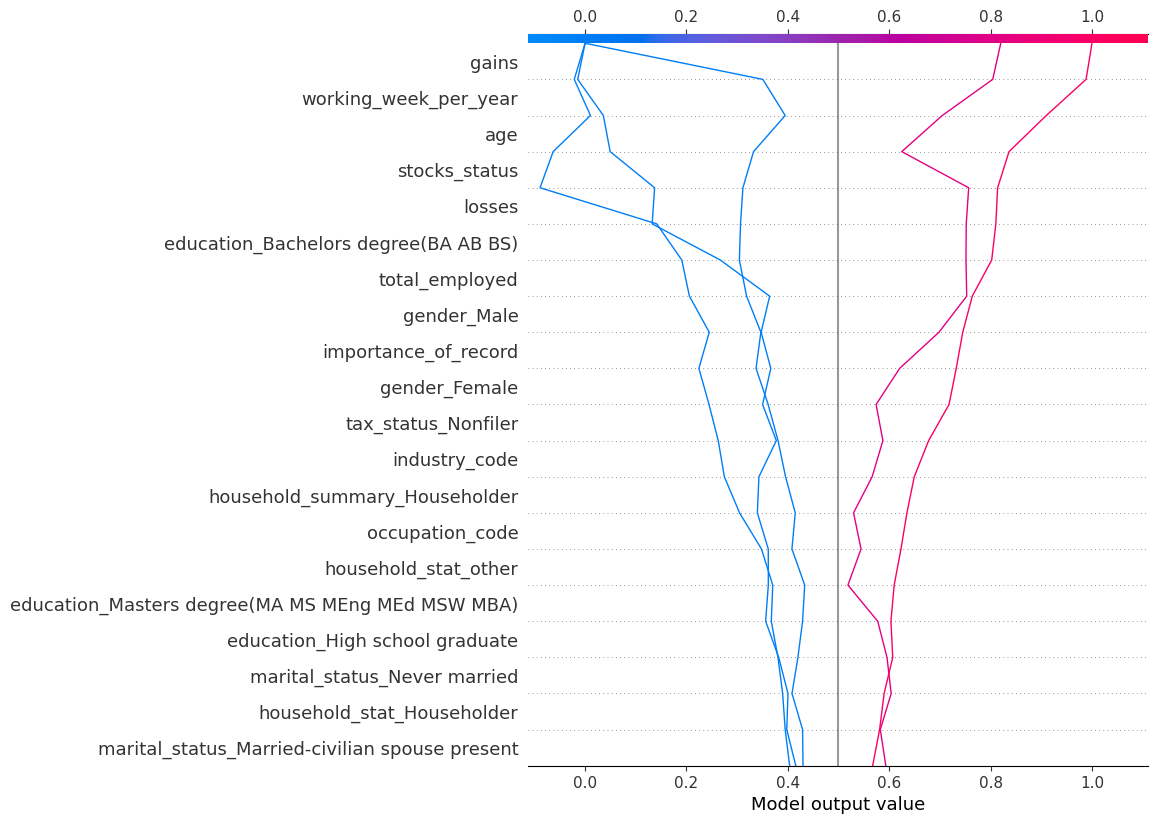

In [77]:
shap.decision_plot(explainer.expected_value[0], shap_values_fp_2[0],feature_names=list(X_train_encoded.columns))